In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
x = np.arange(0, 10, 1E-2)


In [4]:
# linear fcn f(x) = ax + b
# f = lambda x: x**1
# g = lambda x: x**0

# --- general formulation F(x) = a*f(x) + b*g(x)

f = lambda x: np.cos(2*x)
g = lambda x: np.exp(x)

coefs = [20, 1]
funs = [f, g]

In [5]:
y = np.zeros((max(x.shape)))
for ind, fun in enumerate(funs):
    y += coefs[ind] * fun(x)

In [6]:
# add noise
noise = 4
mean_y = np.mean(y)
for i in range(max(y.shape)):
    y[i] += random.uniform(-noise * mean_y, noise * mean_y)



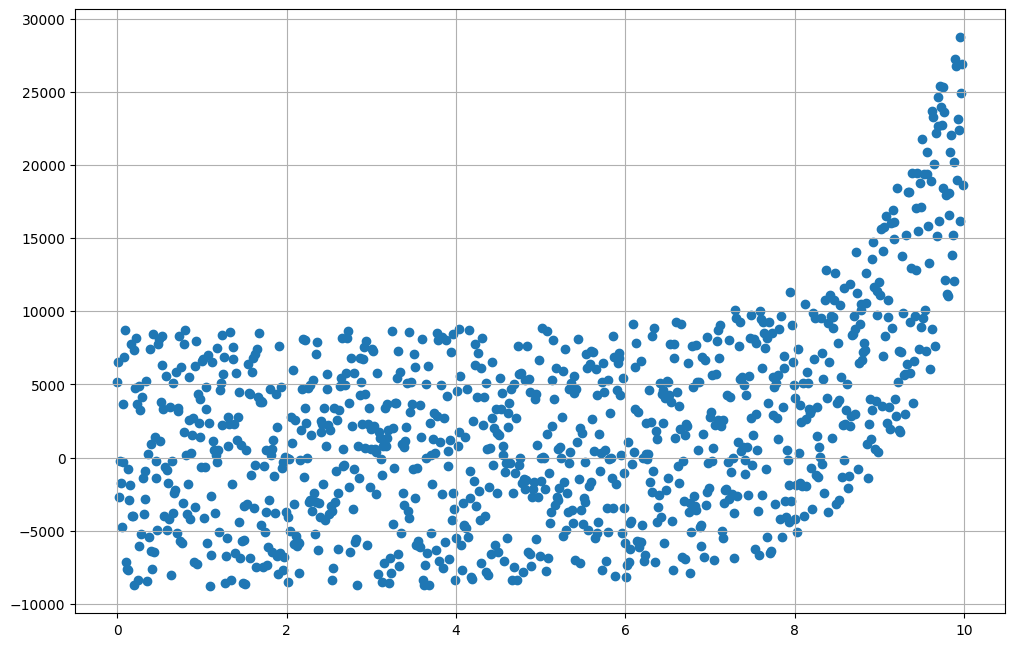

In [7]:
plt.scatter(x,y)
plt.grid()

In [8]:
# implement LMS
A = np.zeros((len(funs), len(funs)))
b = np.zeros((len(funs), 1))

# main loop

for i in range(max(A.shape)):
    b[i] = np.sum(funs[i](x)*y)
    for j in range(max(A.shape)):
        A[i, j] = np.sum(funs[i](x) * funs[j](x))

# solve system
sol = np.linalg.inv(A) @ b
print(f'computed coefs: {sol}')



computed coefs: [[130.89619157]
 [  1.03121466]]


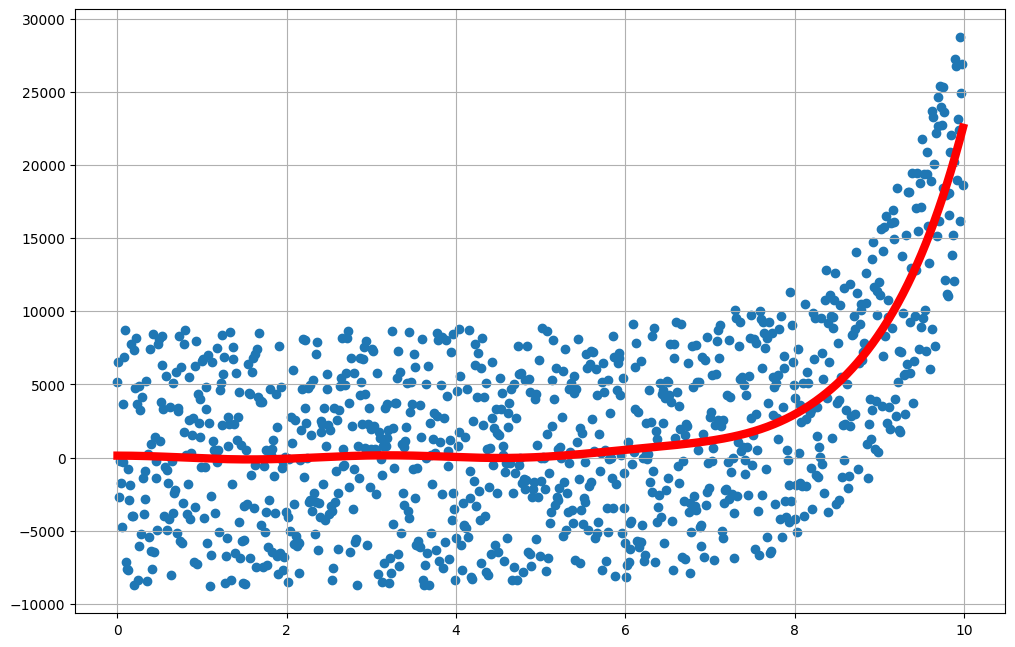

In [11]:
# re construct the model
ff = lambda x: sol[0]*funs[0](x) + sol[1]*funs[1](x)
plt.scatter(x,y)
plt.plot(x, ff(x), 'r-', linewidth=6)
plt.grid()
plt.show()



In [10]:
# compute cost fcn
phi = np.sum((ff(x) - y)**2)
print(f'cost function value : {phi}')

cost function value : 25307405756.57341
